In [1]:
# Importing libraries and the data set

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reading the dataset in a dataframe using Pandas

data = pd.read_csv("dataset.csv")

In [3]:
# Univariate Analysis
# Some quick data exploration

print(data.shape)

data.head(10)#Printing the dataset to explore first 10 row datavisually

(736, 7)


,date,pm25,pm10,o3,no2,so2,co
0,2020/6/1,106,54,31,7,2,4
1,2020/6/2,103,57,40,9,4,4
2,2020/6/3,112,65,21,11,4,6
3,2020/6/4,127,41,23,10,1,5
4,2020/6/5,95,43,25,8,1,4
5,2020/6/6,91,50,,14,1,7
6,2020/6/7,95,,,,,
7,2020/5/1,136,66,63,,3,3
8,2020/5/2,92,51,38,1,2,4
9,2020/5/3,86,30,69,2,3,4


In [4]:
#Remove unnecessary features

drop_features = {"date"}
data = data.drop(columns=drop_features)
data.head()

,pm25,pm10,o3,no2,so2,co
0,106,54,31,7,2,4
1,103,57,40,9,4,4
2,112,65,21,11,4,6
3,127,41,23,10,1,5
4,95,43,25,8,1,4


In [5]:
#Missing Data
#Replacing each empty string in dataset with NaN

data = data.replace(r'^\s*$',np.nan,regex=True)

In [6]:
data.head(10)

,pm25,pm10,o3,no2,so2,co
0,106,54,31,7,2,4
1,103,57,40,9,4,4
2,112,65,21,11,4,6
3,127,41,23,10,1,5
4,95,43,25,8,1,4
5,91,50,NaN,14,1,7
6,95,NaN,NaN,NaN,NaN,NaN
7,136,66,63,NaN,3,3
8,92,51,38,1,2,4
9,86,30,69,2,3,4


In [7]:
print(data.isnull().sum())

 pm25     5
 pm10     5
 o3       6
 no2     10
 so2      4
 co       4
dtype: int64


In [8]:
data.dropna(inplace=True)

In [9]:
print(data.shape)

(718, 6)


In [10]:
# Handling Types of Feautres

data.dtypes

 pm25    object
 pm10    object
 o3      object
 no2     object
 so2     object
 co      object
dtype: object

In [11]:
print(data.columns.tolist())

[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']


In [12]:
all_features = {' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'}
for feature in all_features:
    data[feature] = data[feature].astype("int")



In [13]:
data.dtypes

 pm25    int32
 pm10    int32
 o3      int32
 no2     int32
 so2     int32
 co      int32
dtype: object

In [14]:
data.describe()

,pm25,pm10,o3,no2,so2,co
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,148.880223,107.760446,42.538997,13.757660,4.310585,9.855153
std,68.847959,79.529165,25.187897,6.510139,2.294782,9.652175
min,24.000000,10.000000,1.000000,1.000000,1.000000,2.000000
25%,102.000000,61.000000,23.000000,10.000000,3.000000,5.000000
50%,140.000000,92.000000,38.000000,13.000000,4.000000,7.000000
75%,179.750000,130.000000,57.000000,17.000000,5.000000,11.000000
max,559.000000,967.000000,148.000000,50.000000,14.000000,94.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 730
Data columns (total 6 columns):
 pm25    718 non-null int32
 pm10    718 non-null int32
 o3      718 non-null int32
 no2     718 non-null int32
 so2     718 non-null int32
 co      718 non-null int32
dtypes: int32(6)
memory usage: 22.4 KB


In [16]:
data.median()

 pm25    140.0
 pm10     92.0
 o3       38.0
 no2      13.0
 so2       4.0
 co        7.0
dtype: float64

In [17]:
data.mode()

,pm25,pm10,o3,no2,so2,co
0,140.0,51.0,22.0,14,3.0,5.0
1,NaN,NaN,NaN,15,NaN,NaN


In [18]:
data.mean()

 pm25    148.880223
 pm10    107.760446
 o3       42.538997
 no2      13.757660
 so2       4.310585
 co        9.855153
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0AD3F610>,
      dtype=object)

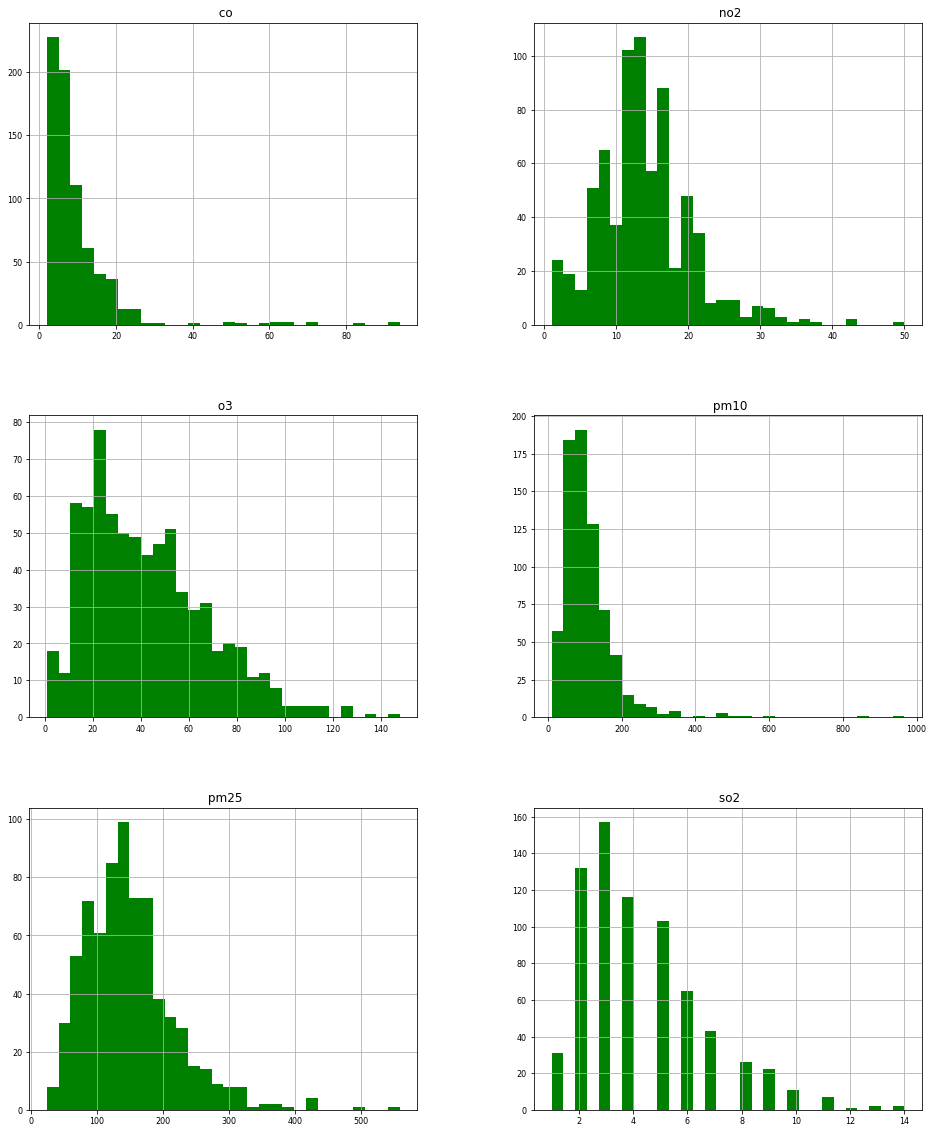

In [19]:
#Output Distribution

numerical_features = data.select_dtypes(include = ['int32'])
numerical_features.hist(figsize=(16, 20), color = 'g', bins=30, xlabelsize=8, ylabelsize=8)

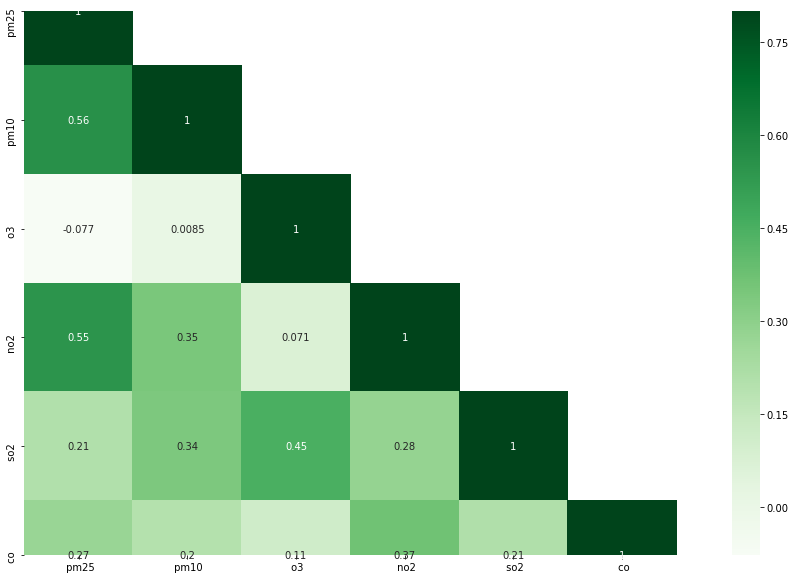

In [20]:
#Correlation Matrix

corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sb.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)